1. Read in the provided data file using pandas and convert missing data to NA values.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

data = pd.read_csv("~/work/exercises/final-exercise-hennaylimaa/data/2315676.txt", na_values=-9999, skiprows=[1], delim_whitespace=True)

print("Length of data before remove of null values:", data.shape[0])

Length of data before remove of null values: 41065


2. Fill in the missing values in the `TAVG` column with your estimates of the average daily temperature as noted above in the data section. You can then drop any average daily temperatures that are still missing.

In [50]:
data["AVG"] = (data['TMAX'] + data['TMIN']) / 2 #data[['TMAX', 'TMIN']].mean(axis=1)
data.loc[data['TAVG'].isna() == True, 'TAVG'] = data['AVG']
data = data.dropna(subset=['TAVG'])

print("Length of data after remove of null values:", data.shape[0])
data.head()

Length of data after remove of null values: 40882


,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,AVG
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,-17.5,2.0,-37.0,-17.5
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,-10.0,6.0,-26.0,-10.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,-10.0,7.0,-27.0,-10.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,-15.0,-3.0,-27.0,-15.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,-16.0,4.0,-36.0,-16.0


3. Define and use a function to convert temperatures in Fahrenheit to Celsius.

In [51]:
"""Function to convert Fahrenheit temperature into Celsius.

    Parameters:
        temp_fahrenheit: int | float
            Input temperature in Fahrenheit (should be a number)

    Returns:
        Temperature in Celsius (float)
    
    Author:
        Henna Ylimaa - 8.3.2022
"""
# function that converts fahrenheits to celsius
# one value in fahrenheit is given to the funtion
def fahr_to_celsius(temp_fahrenheit):
    
    # converts temp_fahrenheit to celsius
    converted_temp = (temp_fahrenheit - 32) / 1.8
    
    # converted_temp that have the celsius value is returned
    return converted_temp

data["TAVG_C"] = data["TAVG"].apply(fahr_to_celsius)
data["TMAX_C"] = data["TMAX"].apply(fahr_to_celsius)
data["TMIN_C"] = data["TMIN"].apply(fahr_to_celsius)
data["AVG_C"] = data["AVG"].apply(fahr_to_celsius)
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,AVG,TAVG_C,TMAX_C,TMIN_C,AVG_C
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,-17.5,2.0,-37.0,-17.5,-27.500000,-16.666667,-38.333333,-27.500000
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,-10.0,6.0,-26.0,-10.0,-23.333333,-14.444444,-32.222222,-23.333333
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,-10.0,7.0,-27.0,-10.0,-23.333333,-13.888889,-32.777778,-23.333333
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,-15.0,-3.0,-27.0,-15.0,-26.111111,-19.444444,-32.777778,-26.111111
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,-16.0,4.0,-36.0,-16.0,-26.666667,-15.555556,-37.777778,-26.666667


4. Calculate seasonal average temperatures for each season in every year (e.g., Winter 1909, Spring 1909, Summer 1909, ...)

In [52]:
data.loc[:,'DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')
# season column
def season_from_dt(date):
    if date.month in (12, 1, 2):
        return 1
    elif date.month in (3, 4, 5):
        return 2
    elif date.month in (6, 7, 8):
        return 3
    elif date.month in (9, 10, 11):
        return 4
data['season'] = data['DATE'].apply(season_from_dt)
data['year'] = pd.DatetimeIndex(data['DATE']).year
seasonal_averages = data.groupby(['year', 'season'], as_index=False)['TAVG_C'].mean()

5. Calculate seasonal average temperatures for the reference period 1951-1980 (e.g., 4 values in total, one for each season)

In [53]:
selection = seasonal_averages.loc[(seasonal_averages["year"] >= 1951) & (seasonal_averages["year"] < 1981)]
reference_periods = selection.groupby('season', as_index=False)['TAVG_C'].mean()
reference_periods.rename(columns={'TAVG_C': 'ref_temp'}, inplace=True)
reference_periods.head()

,season,ref_temp
0,1,-13.553475
1,2,-2.338516
2,3,12.400262
3,4,-0.816010


6. Calculate seasonal temperature anomalies for each year

In [54]:
# merges reference_temp's information based on month columns values
seasonal_anomalies = seasonal_averages.merge(reference_periods, on = 'season')

# calculates difference of TAVG_C and ref_temp to column diff
seasonal_anomalies['diff'] = seasonal_anomalies['TAVG_C'] - seasonal_anomalies['ref_temp']
seasonal_anomalies = seasonal_anomalies.sort_values(['year', 'season'])
seasonal_anomalies.head(10)
seasonal_anomalies = seasonal_anomalies.loc[(seasonal_anomalies.year >= 1909) & (seasonal_anomalies.year < 2020)]

7. Plot the data as shown in the example above

<AxesSubplot:title={'center':'Autumn'}, xlabel='Date', ylabel='Temperature anomaly (°C)'>

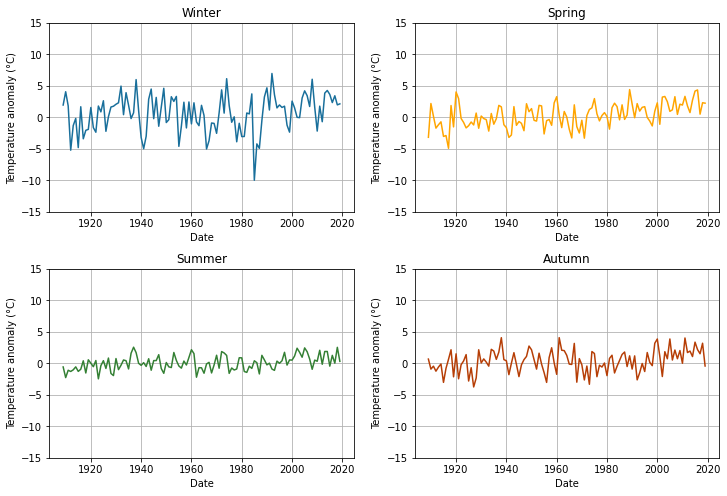

In [62]:
# muista start ja end arvot rajaus
winter = seasonal_anomalies.loc[(seasonal_anomalies.season == 1)]
winter= winter.set_index('year')
winter_temps = winter["diff"]

spring = seasonal_anomalies.loc[(seasonal_anomalies.season == 2)]
spring= spring.set_index('year')
spring_temps = spring["diff"]

summer = seasonal_anomalies.loc[(seasonal_anomalies.season == 3)]
summer= summer.set_index('year')
summer_temps = summer["diff"]

autumn = seasonal_anomalies.loc[(seasonal_anomalies.season == 4)]
autumn = autumn.set_index('year')
autumn_temps = autumn["diff"]


# figure creation
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(hspace = 0.3)

# Rename the axes for ease of use
ax11 = axs[0][0]
ax12 = axs[0][1]
ax21 = axs[1][0]
ax22 = axs[1][1]

line_width = 1.5

winter_temps.plot(ax=ax11, c="#196f9b", lw=line_width, ylim=[-15, 15], grid=True, xlabel='Date', ylabel='Temperature anomaly (°C)', title = 'Winter')
spring_temps.plot(ax=ax12, c="orange", lw=line_width, ylim=[-15, 15], grid=True, xlabel='Date', ylabel='Temperature anomaly (°C)', title = 'Spring')
summer_temps.plot(ax=ax21, c="#348034", lw=line_width, ylim=[-15, 15], grid=True, xlabel='Date', ylabel='Temperature anomaly (°C)', title = 'Summer')
autumn_temps.plot(ax=ax22, c="#b63e06", lw=line_width, ylim=[-15, 15], grid=True, xlabel='Date', ylabel='Temperature anomaly (°C)', title = 'Autumn')

#only comments left